# РК №2 
## Корсаков Н. А. РТ5-61Б
## Вариант 7
Для заданного набора данных (Ирисы Фишера) постройте модели классификации. Для построения моделей используйте методы "Дерево решений"	и "Градиентный бустинг". Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик).

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Подготовка данных

В качестве набора данных будем использовать Iris dataset.

In [ ]:
# https://scikit-learn.org/stable/datasets/index.html#iris-dataset
iris = load_iris()

### Общие характеристики датасета

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# Значения целевого признака
np.unique(iris.target)

array([0, 1, 2])

In [ ]:
# Наименования значений целевого признака
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
list(zip(np.unique(iris.target), iris.target_names))

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

In [ ]:
# Значения целевого признака
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Размер выборки
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [ ]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# проверим есть ли пропущенные значения
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## Разделим выборку на обучающую и тестовую

In [ ]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=1)

## Метод обучения №1 (Дерево решений)

In [ ]:
def plot_tree_classification(title_param, ds):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """
    
    n_classes = len(np.unique(ds.target))
    plot_colors = "ryb"
    plot_step = 0.02
    
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = ds.data[:, pair]
        y = ds.target

        # Train
        clf = DecisionTreeClassifier(random_state=1).fit(X, y)

        plt.title(title_param)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(ds.feature_names[pair[0]])
        plt.ylabel(ds.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

        plt.show()

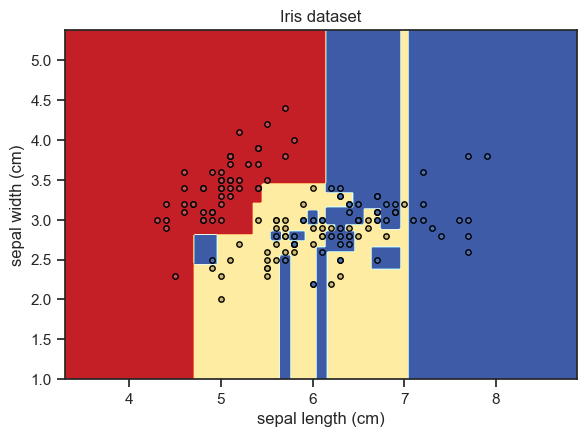

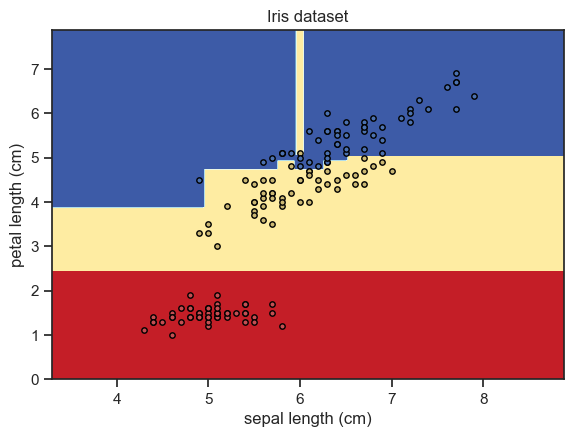

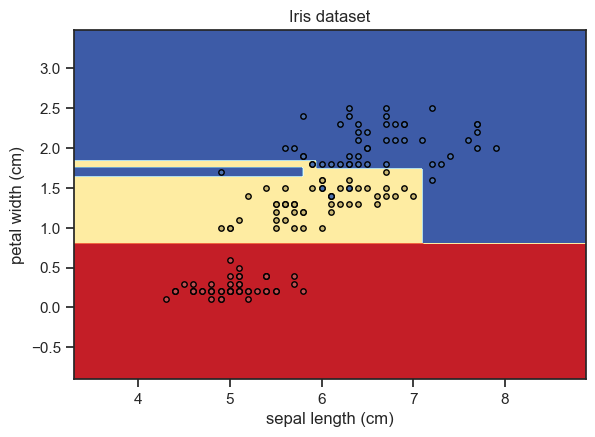

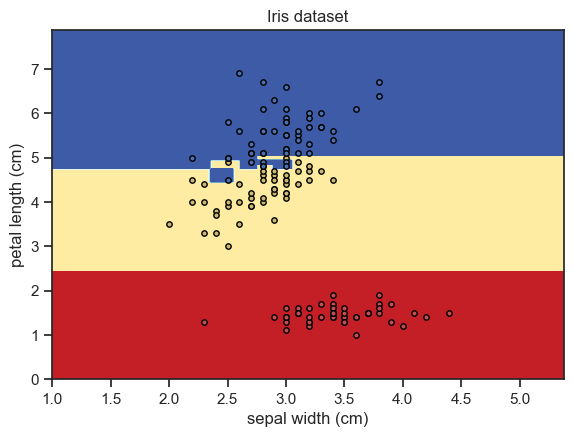

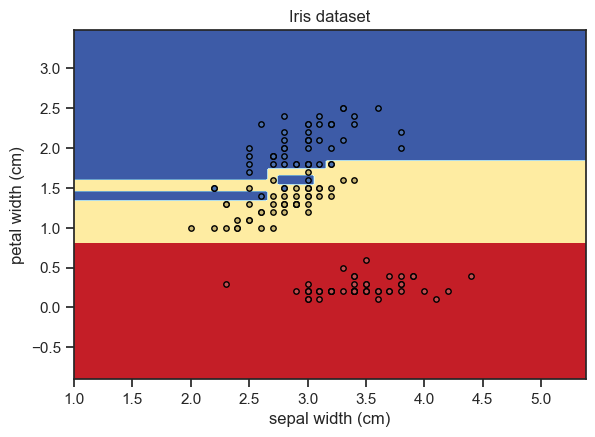

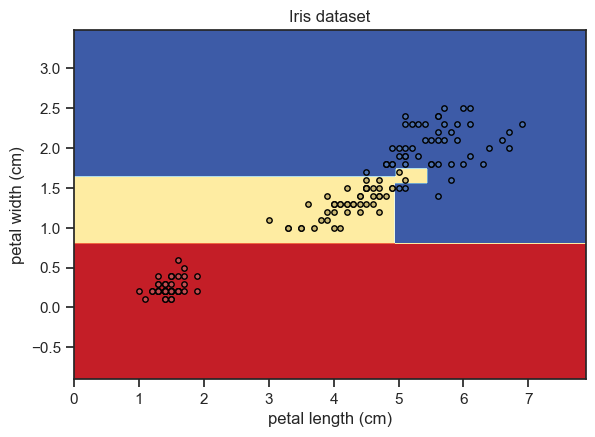

In [ ]:
plot_tree_classification('Iris dataset', iris)

In [ ]:
# Обучим дерево на всех признаках iris
iris_tree_cl = DecisionTreeClassifier(random_state=1)
iris_tree_cl.fit(iris_X_train, iris_y_train)
target_1 = iris_tree_cl.predict(iris_X_test)
len(target_1), target_1

(30,
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        2, 0, 2, 1, 0, 0, 1, 2]))

## Метод обучения №2 (Градиентный бустинг)

In [ ]:
gr_80 = GradientBoostingClassifier(n_estimators=80)
gr_80.fit(iris_X_train, iris_y_train)
target_2 = gr_80.predict(iris_X_test)
len(target_2), target_2

(30,
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        2, 0, 2, 1, 0, 0, 1, 2]))

## Оценка качества моделей

Данные метрики были выбраны, как самые часто встречающиеся для анализа моделей, построенных для задач классификаций

### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

def test_accuracy_model(name, model):
    print('model name: {}'.format(name))
    print('accuracy_score: {}'.format(accuracy_score(iris_y_test, model), 2))

In [ ]:
test_accuracy_model('Дерево решений', target_1)
print()
test_accuracy_model('Градиентный бустинг', target_2)

model name: Дерево решений
accuracy_score: 0.9666666666666667

model name: Градиентный бустинг
accuracy_score: 0.9666666666666667


### Матрица ошибок или Confusion Matrix

In [ ]:
def test_confusion_matrix_model(name, method, model):
    print('model name: {}'.format(name))
    print(confusion_matrix(iris_y_test, model, labels=[0, 1, 2]))
    plot_confusion_matrix(method, iris_X_test, iris_y_test, 
                      display_labels=iris.target_names, 
                      cmap=plt.cm.Blues, normalize='true')

model name: Дерево решений
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

model name: Градиентный спуск
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


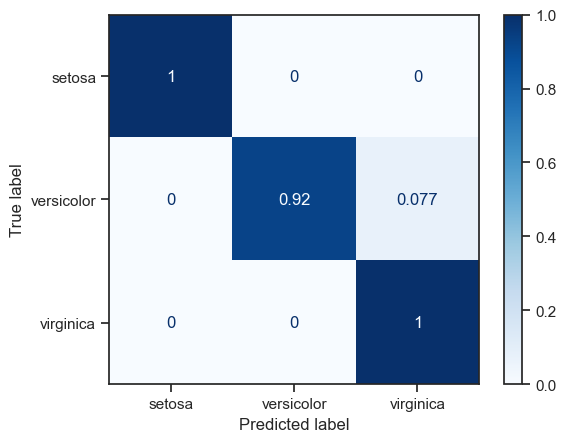

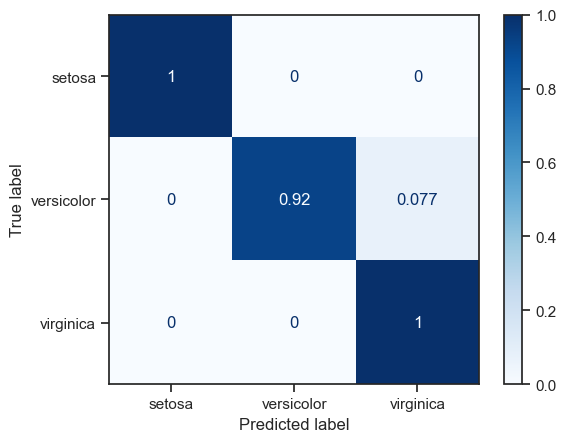

In [ ]:
test_confusion_matrix_model('Дерево решений', iris_tree_cl, target_1)
print()
test_confusion_matrix_model('Градиентный спуск', gr_80, target_2)

## Вывод

Как можно заметить, посмотрев на результаты обоих метрик, что их качества совпадают, следовательно нельзя выбрать какой-то один метод обучения, можно использовать оба.